Exercise 1 - Exploring Input Data
---

For this exercise we will be working with a dataset which was collected in the field in South Africa. This dataset contains 1000 crop fields are information about the crop type in this field, irrigation information, and geographic information. We will be using this dataset to create a labeled training dataset consisting of raster crop labels and a timeseries of matching Sentinel-2 Imagery.

Loading and Exploring Input Data
---

This first cell will load the file which contains the collected data and loads it into a Pandas dataframe. By calling the `head()` function we get a glimpse into the data. For these exercises we will be creating a crop type label dataset so the field we will be using is the `CROPS` field.

In [1]:
import geopandas as gpd
import arrow

input_data = gpd.read_file("../data/south_africa_crops/south_africa_crops.shp")
input_data.head()

OBJECTID  FIELD_ID  FARM_ID          MUNIC        DISTRICT  \
0     16635     16723  29241.0  Breede Valley  Cape Winelands   
1      5354      5406  27339.0  Breede Valley  Cape Winelands   
2      5782      5835  55096.0  Breede Valley  Cape Winelands   
3      5627      5680  14677.0  Breede Valley  Cape Winelands   
4      5373      5425  28703.0  Breede Valley  Cape Winelands   

            IM_SOURCE  CONFIDENCE                      MAPDATE  \
0  Aerial photography         3.0  4 May 2017 - 11 August 2017   
1  Aerial photography         3.0  4 May 2017 - 11 August 2017   
2  Aerial photography         3.0  4 May 2017 - 11 August 2017   
3  Aerial photography         2.0  4 May 2017 - 11 August 2017   
4  Aerial photography         2.0  4 May 2017 - 11 August 2017   

            MAPPER CATNAME  AREAHA      OBSERVER     CAPDATE   CROPTYPE  \
0   Annalie Fourie    Viti   0.792          None  2017-05-15  Intensive   
1  Lodia Gallagher    Viti   0.289          None  2017-05-15  Intensive   
2  Lodia Gallagher    Viti   0.741          None  2017-05-15  Intensive   
3  Lodia Gallagher    Viti   0.618  Carl Visagie  2017-05-16  Intensive   
4  Lodia Gallagher    Viti   1.921  Carl Visagie  2017-05-15  Intensive   

     CROPS    DRY_IRR         IRR_TYPE COMMENTS  \
0    Leeks  Irrigated  Drip irrigation     None   
1    Leeks  Irrigated  Drip irrigation     None   
2   orange  Irrigated  Drip irrigation     None   
3  Oranges  Irrigated  Drip irrigation     None   
4  Peppers  Irrigated  Drip irrigation     None   

                                            geometry  
0  POLYGON ((19.30099 -33.68528, 19.30033 -33.685...  
1  POLYGON ((19.29878 -33.67338, 19.29856 -33.674...  
2  POLYGON ((19.33573 -33.68363, 19.33566 -33.683...  
3  POLYGON ((19.30970 -33.68575, 19.30915 -33.686...  
4  POLYGON ((19.29678 -33.66965, 19.29620 -33.672...

Data CRS
---
Here we see that the data was collected in the WGS 84 Coordinate Reference System

In [2]:
input_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Listing Unique Crop Values
---

This next cell finds all of the unique values present in the `CROPS` field and prints them out. Notice that there are several variations of the `Oranges` crop listed here. We see here that there exists `Oranges`, `Orange`, and `orange`. We will need to clean this field so that they are all the same value.

In [4]:
list(input_data.CROPS.unique())

['Leeks',
 'orange',
 'Oranges',
 'Peppers',
 'Orange',
 'Barley',
 'Wheat',
 'Tomatoes']

Dataset Temporal Range
---

Each record in our dataset contains a date for when the record was captured (in the `CAPDATE` field). In order to match imagery with the dataset we will need to determine the temporal range of the dataset. From the code in this cell we can tell that the temporal range is from May 15, 2017 to March 10, 2018.

In [5]:
capture_dates = [ arrow.get(row, 'YYYY-MM-DD') for row in input_data.CAPDATE ]

capture_date_range = [
    min(capture_dates).format('YYYY-MM-DD'),
    max(capture_dates).format('YYYY-MM-DD')
]

print(capture_date_range)

['2017-05-15', '2018-03-10']


Mapping Dataset
---

The following cell can be used to view the input data on a map and color the polygons according to the value of the `CROPS` field.

<AxesSubplot:>

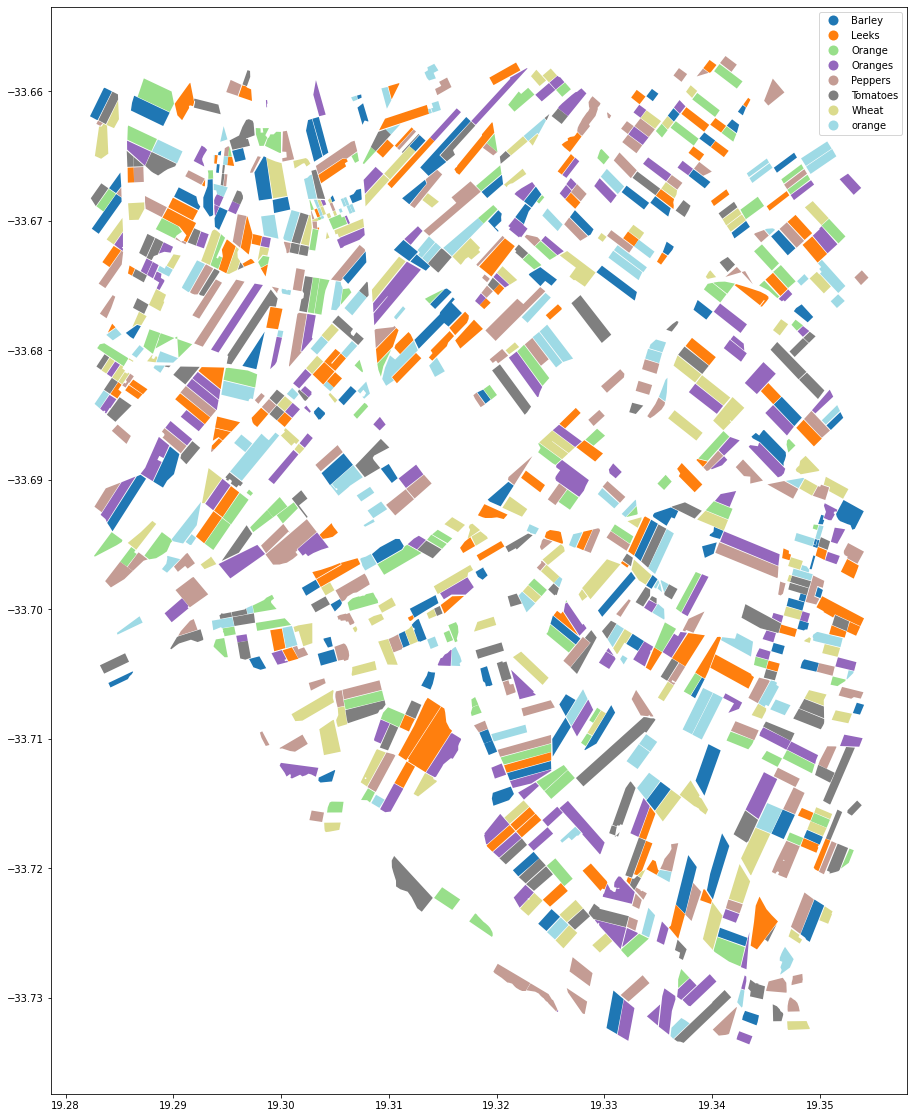

In [6]:
input_data.plot(column="CROPS", legend=True, figsize=(20,20), cmap='tab20')

Checking for Invalid Geometries
---

The last thing we need to check for is invalid geometries. We see here that there are three fields which are invalid geometries, they are all self-intersecting polygons.

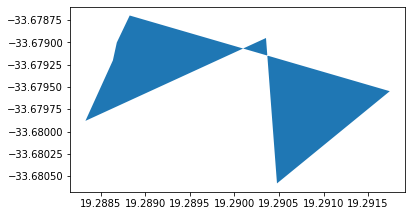

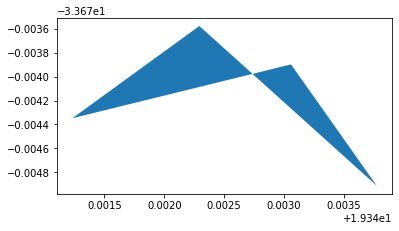

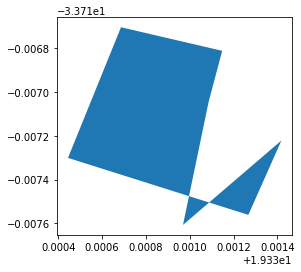

In [7]:
for geometry in input_data.geometry:
    if not geometry.is_valid:
        gpd.GeoSeries(geometry).plot()